In [1]:
import pandas as pd
import os
import sys

# Add the path to the directory containing the functions for the analysis. These are based on the method described in the dissertation and in the own_method_explained notebook.
# Adapt the path as necessary for your environment.
sys.path.append(r'G:\My Drive\Uni\Thesis\Data\Lab Book\python_functions')

from cutoff_method_final import cutoff_analysis, process_results_dict

In [2]:
# Read in all initial data from Excel files.
# Adjust as necessary for your environment. For this code to work, it is important that the files end up in a dictionary with the file names as keys and the DataFrames as values.
filenames = ["Stefano_EXT983_LMCD1_FL", "Stefano_EXT983_LMCD1_CR", "Stefano_EXT983_LMCD1_LIM1-2", "Stefano_EXT983_LMCD1_PET", "Stefano_EXT983_TES_CRC" ]

# Read each file into a dictionary
data_dict = {file_name: pd.read_excel("G:/My Drive/Uni/Thesis/Data/Testin_for_TVB/LMCD1 + TesCR/lmcd1_data/"+file_name+".xlsx", sheet_name="proteins") for file_name in filenames}

# Now, data_dict will have the file names as keys and the corresponding DataFrames as values

In [3]:
# Save the processed results to an Excel file, with the full-lenght data and its specific, aspecific and undecided fractions each in a separate sheet
# These are the results of the entire methodology: Sala analysis (with dynamic linear model) + common interactor analysis
def save_processed_results_to_excel_separate_files(processed_results, output_dir, cutoff_or_processed = "updated_cutoff"):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through the processed_results and save each key's datasets to a separate Excel file
    for key, datasets in processed_results.items():
        output_file = os.path.join(output_dir, f"{key}_{cutoff_or_processed}_results.xlsx")

        with pd.ExcelWriter(output_file) as writer:
            for dataset_name, df in datasets.items():
                # Sheet names must be 31 characters or fewer, truncate if necessary
                sheet_name = dataset_name[:31]
                df.to_excel(writer, sheet_name=sheet_name, index=False)

Processing dataset: Stefano_EXT983_LMCD1_FL
Best distance selected: 75 with R² = 0.9962


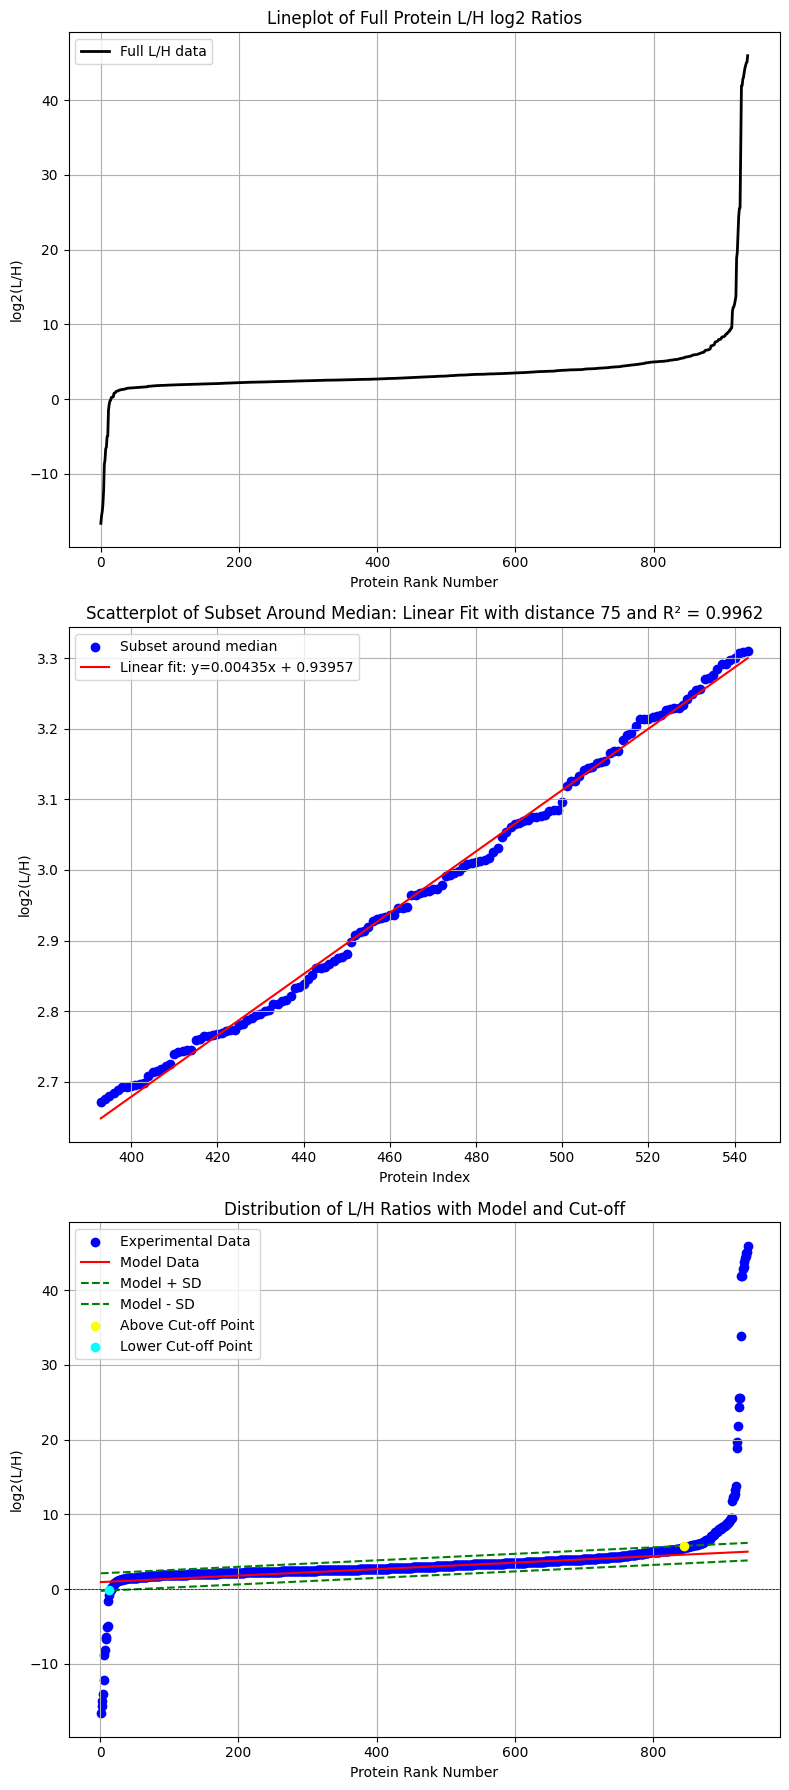

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/venn_cutoffs\Stefano_EXT983_LMCD1_FL_venn_cutoff.png


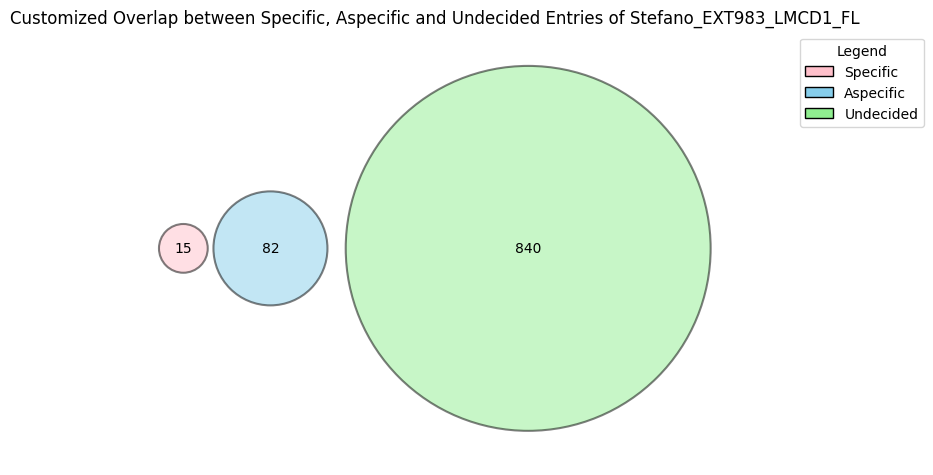

Processing dataset: Stefano_EXT983_LMCD1_CR
Best distance selected: 150 with R² = 0.9957


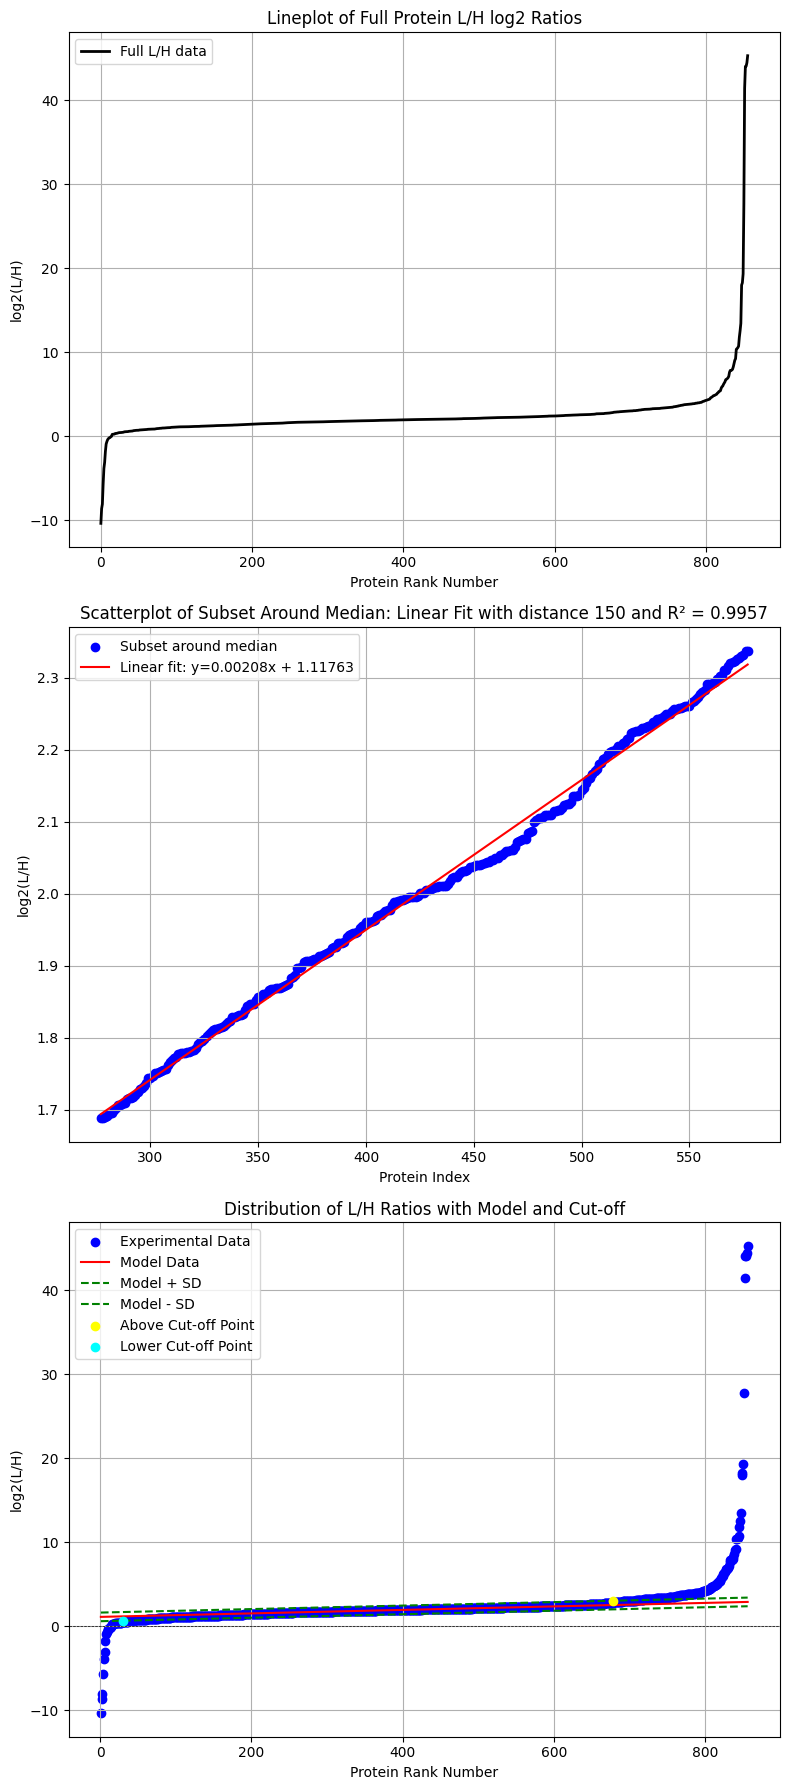

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/venn_cutoffs\Stefano_EXT983_LMCD1_CR_venn_cutoff.png


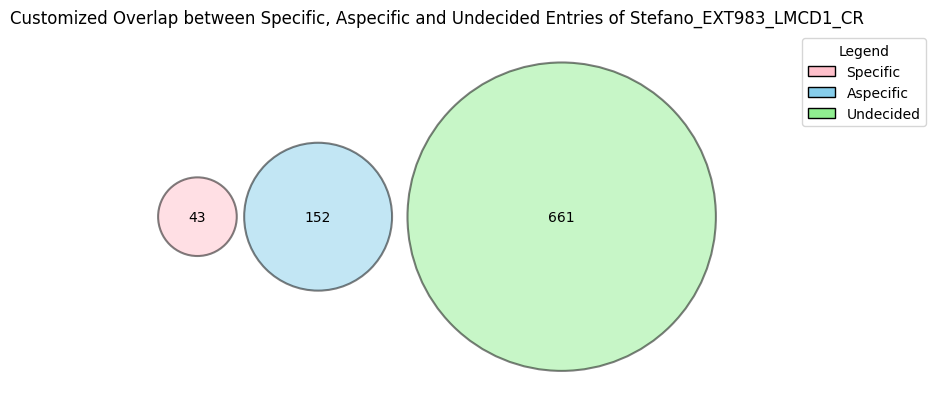

Processing dataset: Stefano_EXT983_LMCD1_LIM1-2
Best distance selected: 175 with R² = 0.9953


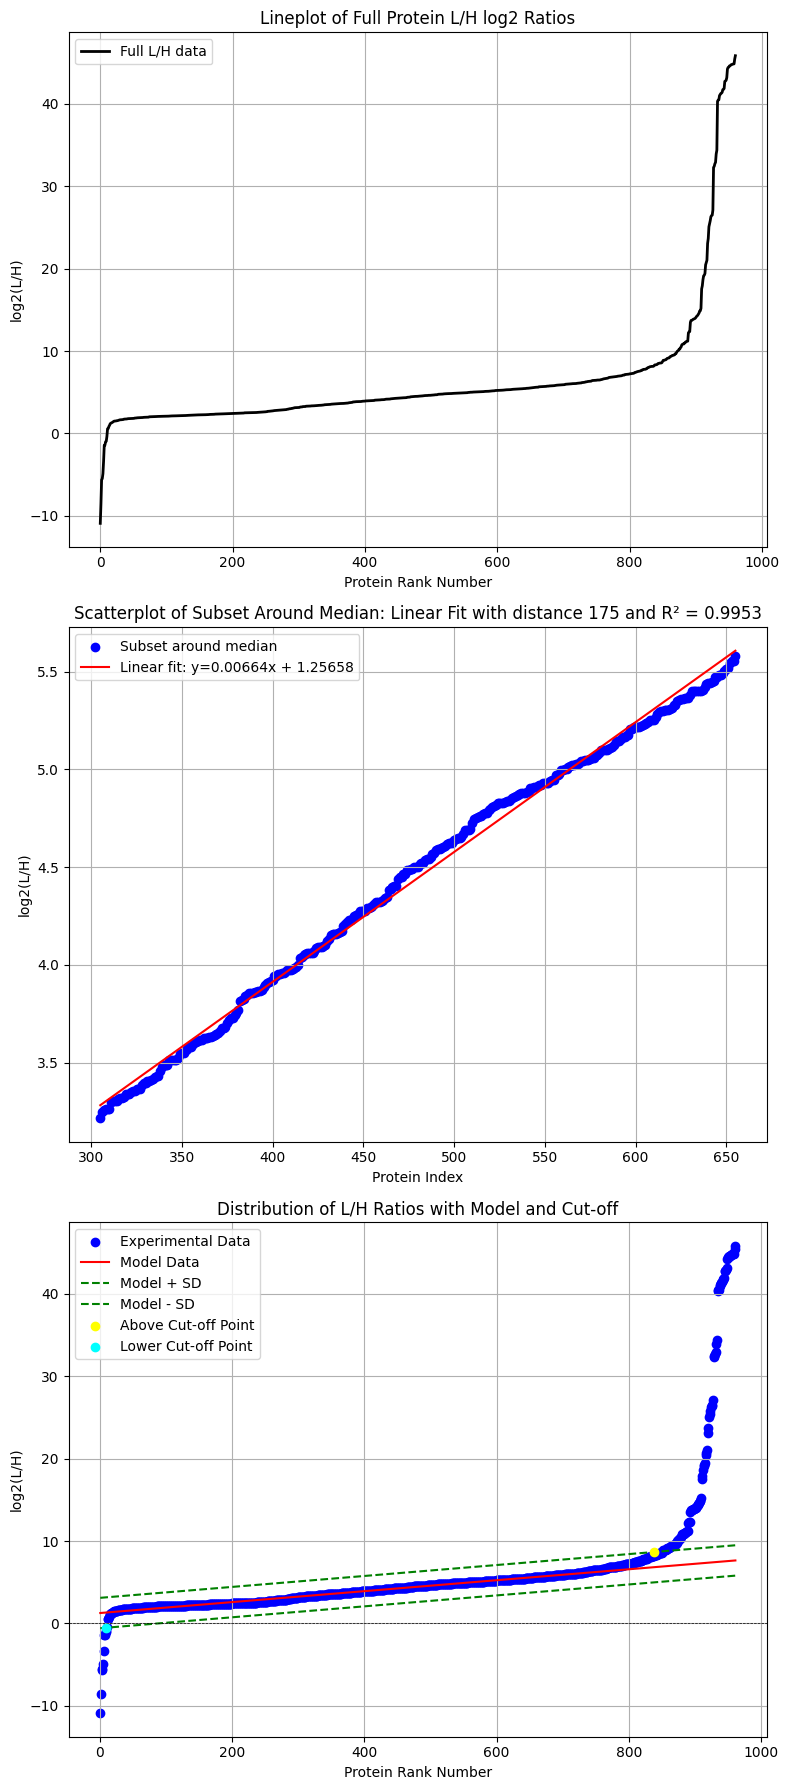

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/venn_cutoffs\Stefano_EXT983_LMCD1_LIM1-2_venn_cutoff.png


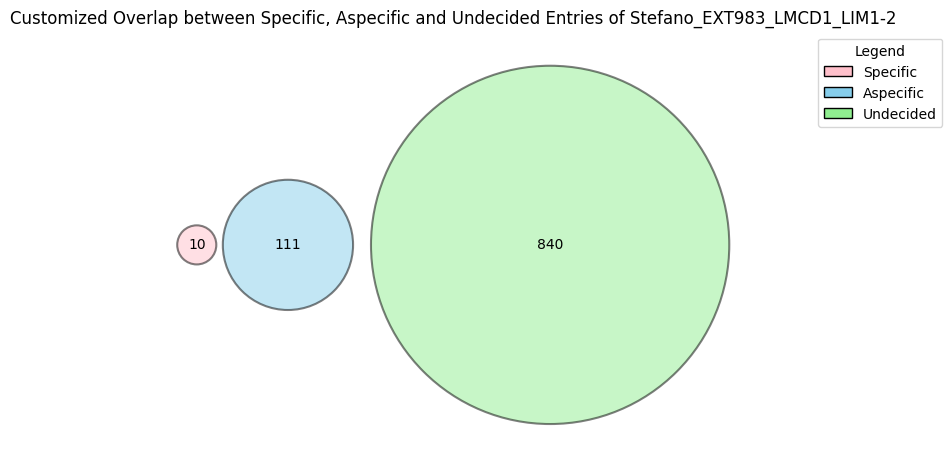

Processing dataset: Stefano_EXT983_LMCD1_PET
Best distance selected: 175 with R² = 0.9793


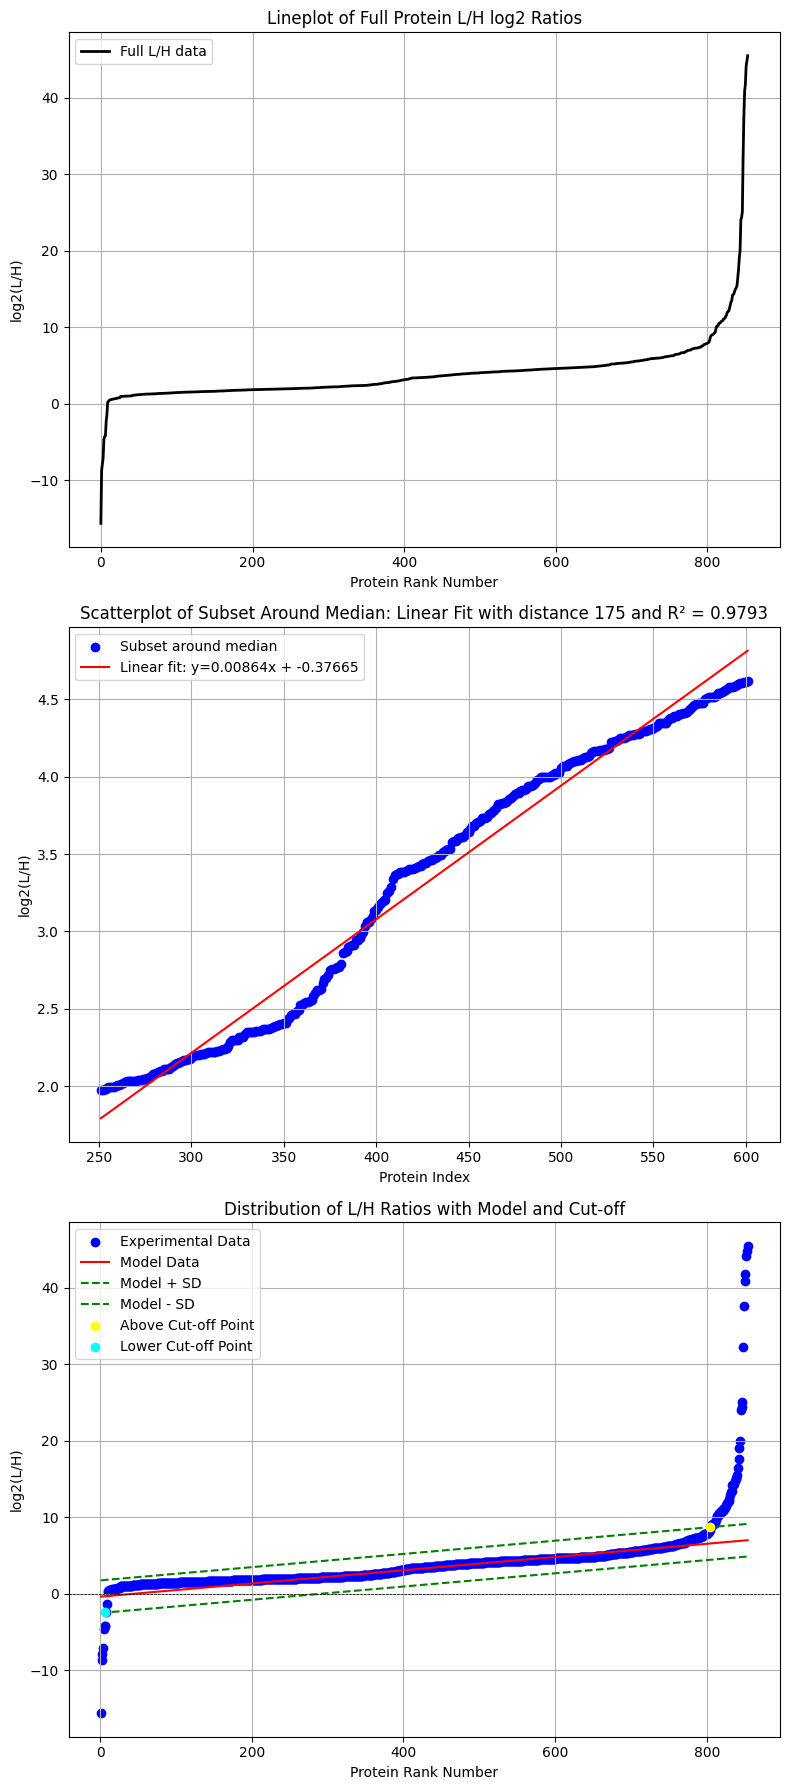

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/venn_cutoffs\Stefano_EXT983_LMCD1_PET_venn_cutoff.png


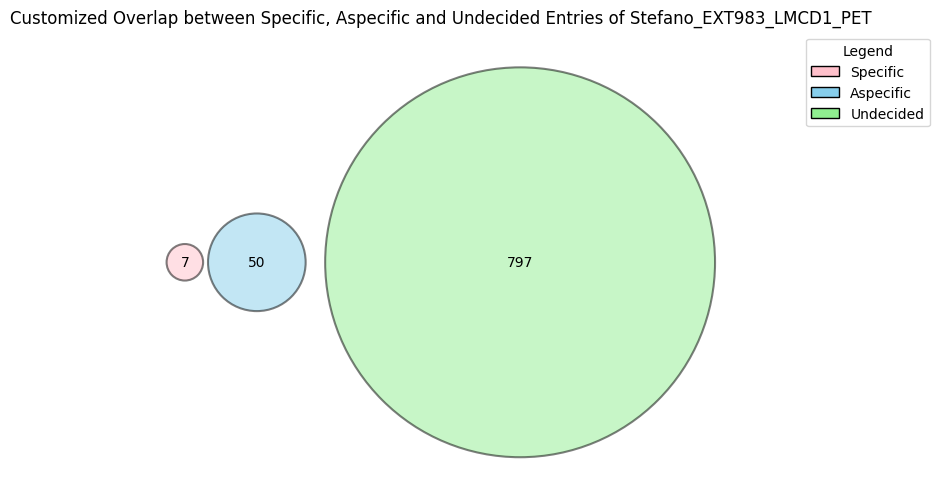

Processing dataset: Stefano_EXT983_TES_CRC
Best distance selected: 100 with R² = 0.9861


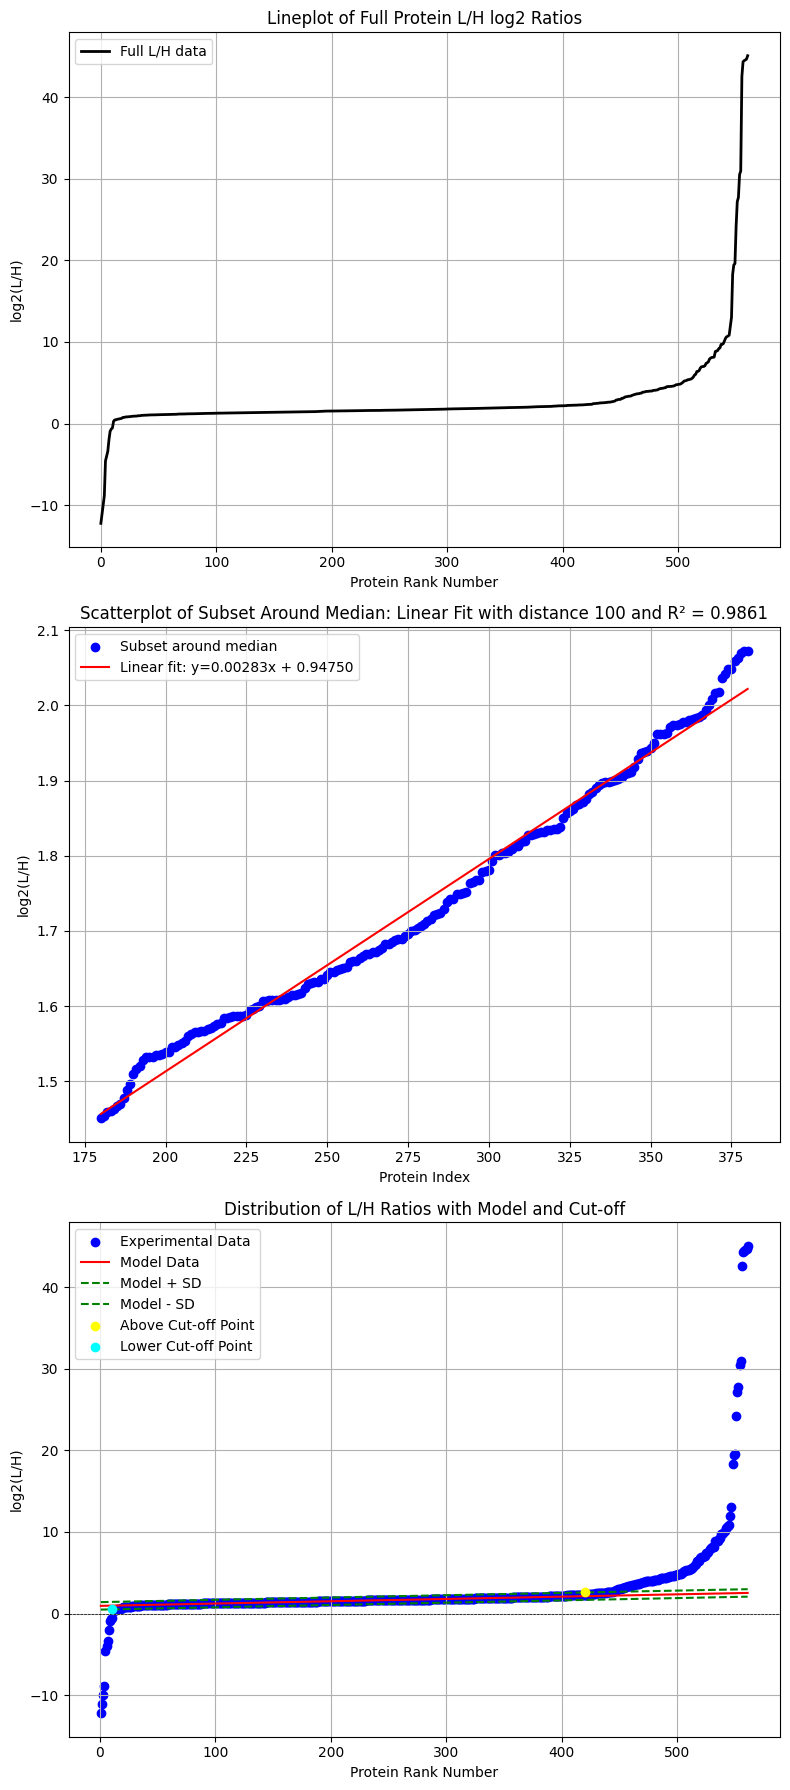

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/venn_cutoffs\Stefano_EXT983_TES_CRC_venn_cutoff.png


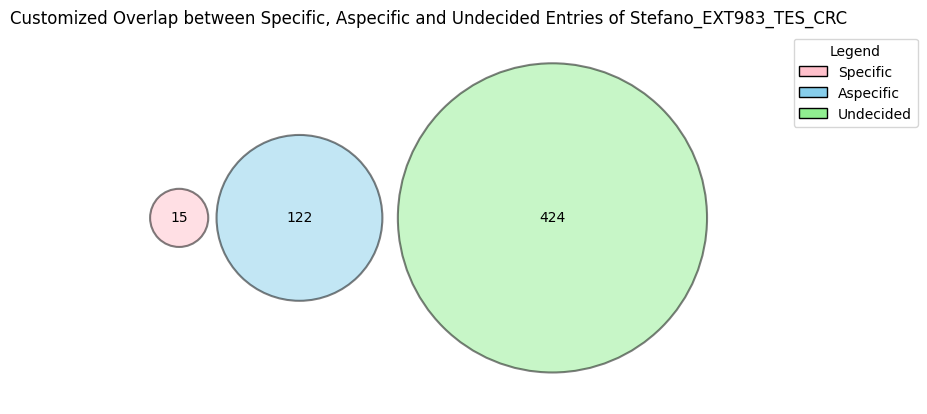

In [4]:
# Iterate through each dataset in the dictionary and apply cutoff_analysis (as defined by Sala et al, with addition of dynamic model fitting)
cutoff_dict = {}

for name, df in data_dict.items():
    print(f"Processing dataset: {name}")
    subset_above, subset_below, subset_undecided = cutoff_analysis(df, name)
    
    # Store the results in a dictionary for each dataset
    cutoff_dict[name] = {
        'full_dataset': df,
        "subset_below_cutoff": subset_below,
        "subset_above_cutoff": subset_above,
        "subset_undecided": subset_undecided
    }

# Now, results_dict will contain the subsets for each dataset


In [ ]:
# Save the results from the updated Sala analysis to a separate Excel file for each dataset, with each subset in a separate sheet.
save_processed_results_to_excel_separate_files(cutoff_dict, "G:/My Drive/Uni/Thesis/Data/datasets_cutoff/updated_cutoff_results", "cutoff")

Total batches to process: 84
Processing batch 1 of 84: 10 IDs
Processing batch 2 of 84: 10 IDs
Processing batch 3 of 84: 10 IDs
Processing batch 4 of 84: 10 IDs
Processing batch 5 of 84: 10 IDs
Processing batch 6 of 84: 10 IDs
Processing batch 7 of 84: 10 IDs
Processing batch 8 of 84: 10 IDs
Processing batch 9 of 84: 10 IDs
Processing batch 10 of 84: 10 IDs
Processing batch 11 of 84: 10 IDs
Processing batch 12 of 84: 10 IDs
Processing batch 13 of 84: 10 IDs
Processing batch 14 of 84: 10 IDs
Processing batch 15 of 84: 10 IDs
Processing batch 16 of 84: 10 IDs
Processing batch 17 of 84: 10 IDs
Processing batch 18 of 84: 10 IDs
Processing batch 19 of 84: 10 IDs
Processing batch 20 of 84: 10 IDs
Processing batch 21 of 84: 10 IDs
Processing batch 22 of 84: 10 IDs
Processing batch 23 of 84: 10 IDs
Processing batch 24 of 84: 10 IDs
Processing batch 25 of 84: 10 IDs
Processing batch 26 of 84: 10 IDs
Processing batch 27 of 84: 10 IDs
Processing batch 28 of 84: 10 IDs
Processing batch 29 of 84: 1

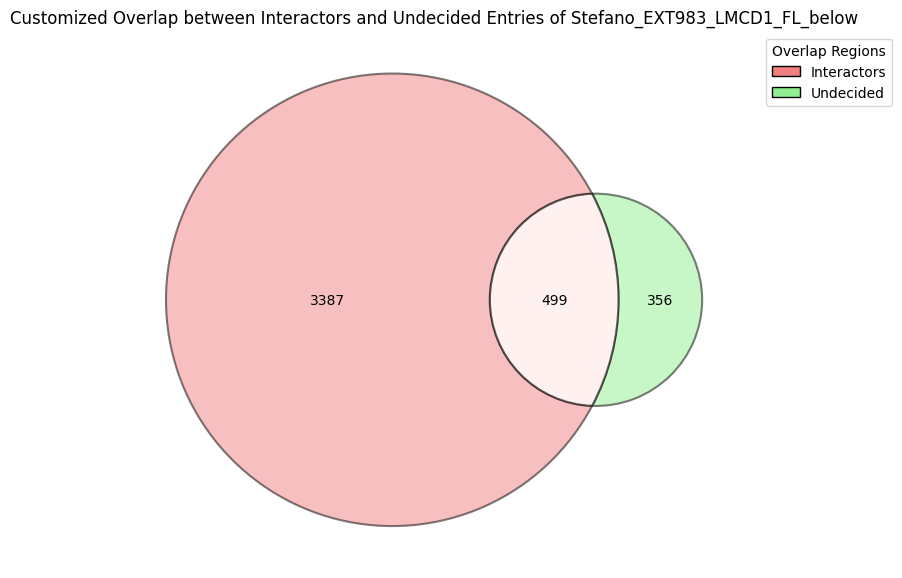

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/venn_interactors\Stefano_EXT983_LMCD1_FL_above_venn_interactors.png


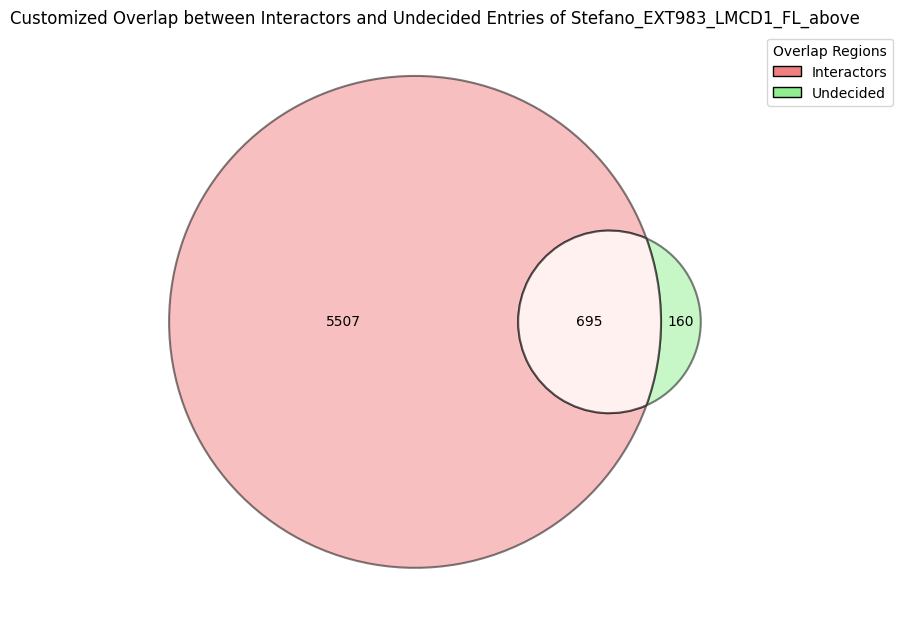

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/updated_venn_cutoffs\Stefano_EXT983_LMCD1_FL_Initial_Overlap_updated_venn_cutoff.png


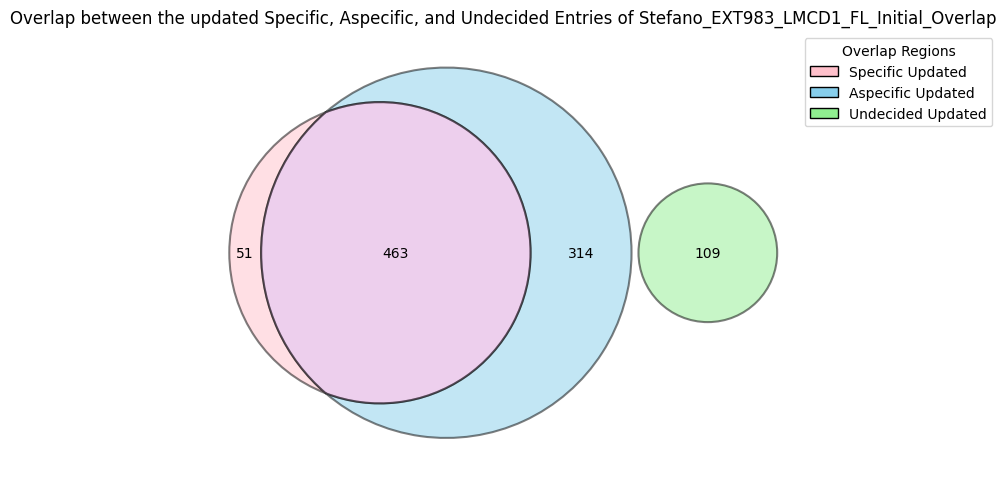

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/updated_venn_cutoffs\Stefano_EXT983_LMCD1_FL_Final_Overlap_updated_venn_cutoff.png


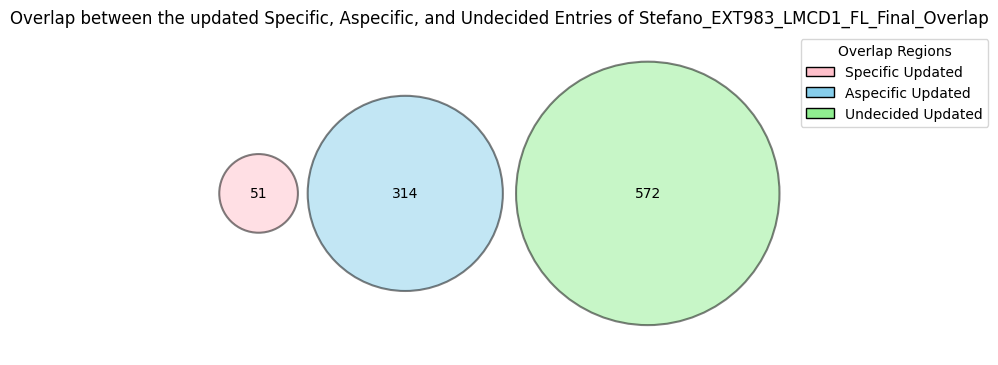

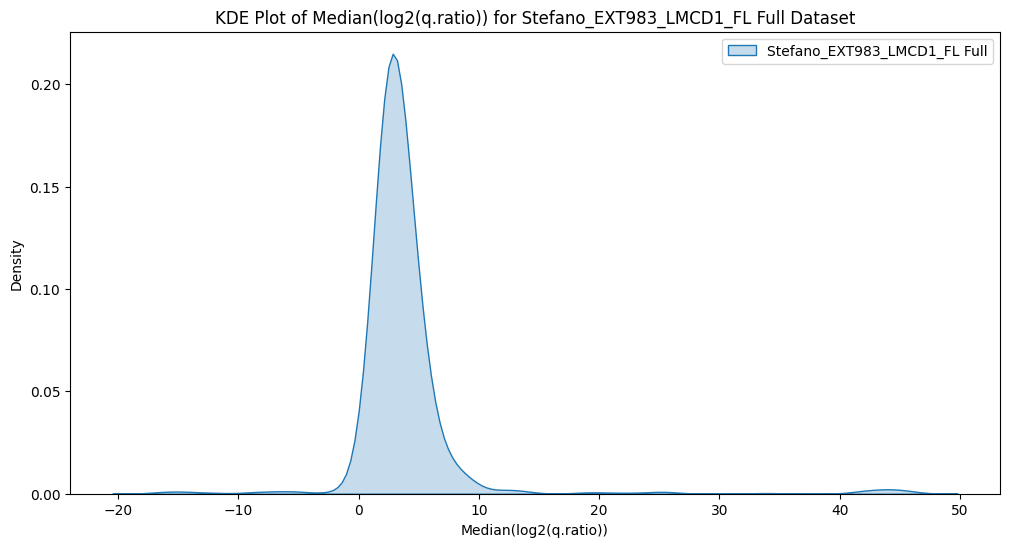

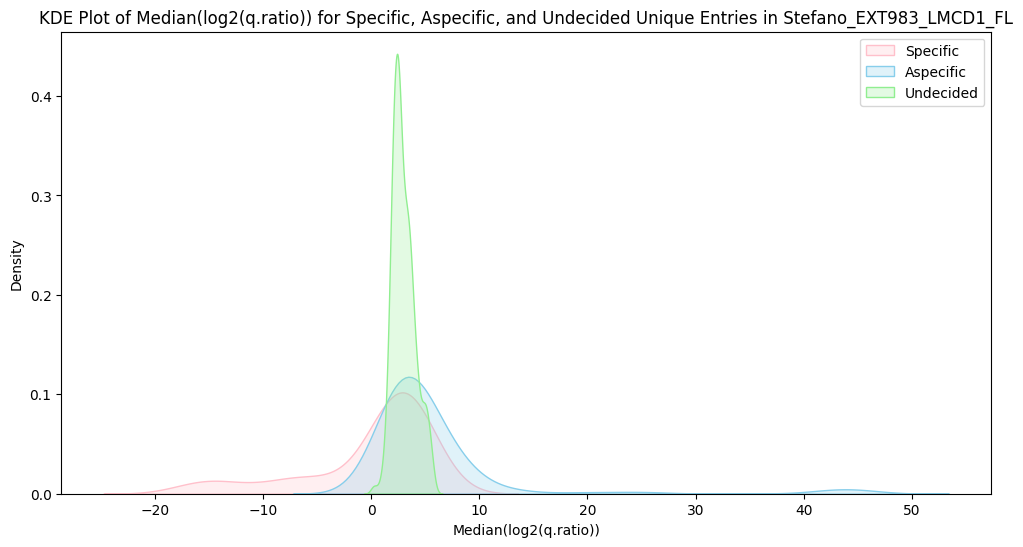

Total batches to process: 67
Processing batch 1 of 67: 10 IDs
Processing batch 2 of 67: 10 IDs
Processing batch 3 of 67: 10 IDs
Processing batch 4 of 67: 10 IDs
Processing batch 5 of 67: 10 IDs
Processing batch 6 of 67: 10 IDs
Processing batch 7 of 67: 10 IDs
Processing batch 8 of 67: 10 IDs
Processing batch 9 of 67: 10 IDs
Processing batch 10 of 67: 10 IDs
Processing batch 11 of 67: 10 IDs
Processing batch 12 of 67: 10 IDs
Processing batch 13 of 67: 10 IDs
Processing batch 14 of 67: 10 IDs
Processing batch 15 of 67: 10 IDs
Processing batch 16 of 67: 10 IDs
Processing batch 17 of 67: 10 IDs
Processing batch 18 of 67: 10 IDs
Processing batch 19 of 67: 10 IDs
Processing batch 20 of 67: 10 IDs
Processing batch 21 of 67: 10 IDs
Processing batch 22 of 67: 10 IDs
Processing batch 23 of 67: 10 IDs
Processing batch 24 of 67: 10 IDs
Processing batch 25 of 67: 10 IDs
Processing batch 26 of 67: 10 IDs
Processing batch 27 of 67: 10 IDs
Processing batch 28 of 67: 10 IDs
Processing batch 29 of 67: 1

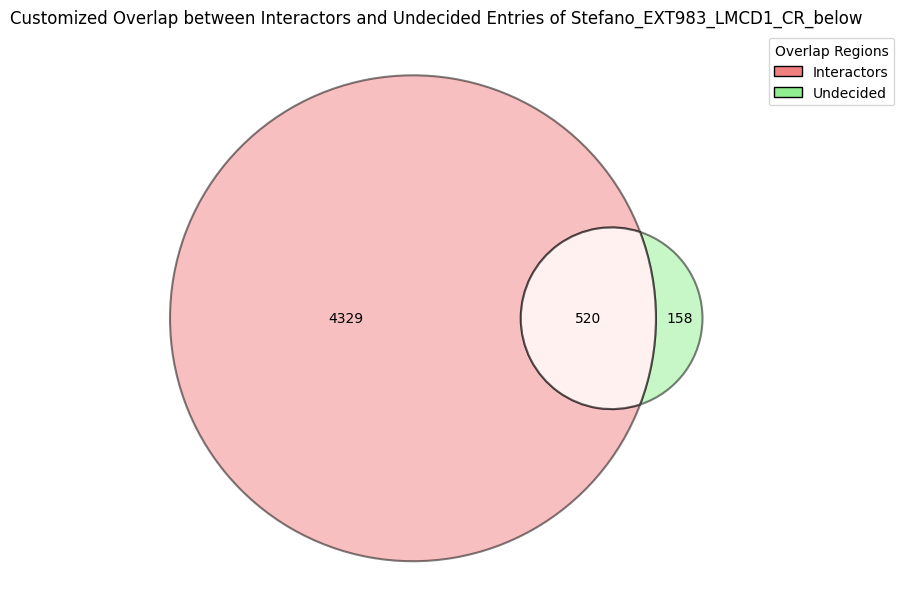

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/venn_interactors\Stefano_EXT983_LMCD1_CR_above_venn_interactors.png


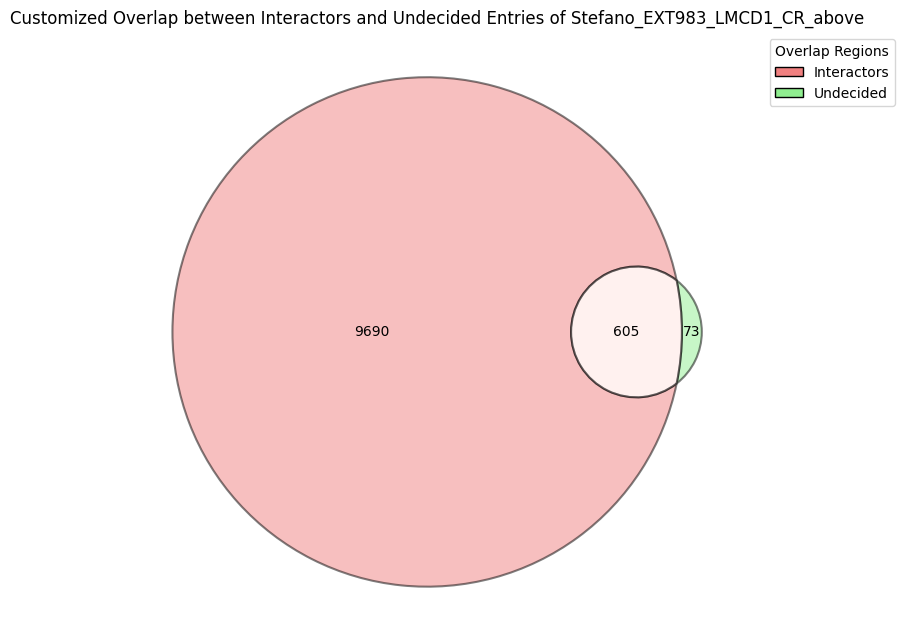

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/updated_venn_cutoffs\Stefano_EXT983_LMCD1_CR_Initial_Overlap_updated_venn_cutoff.png


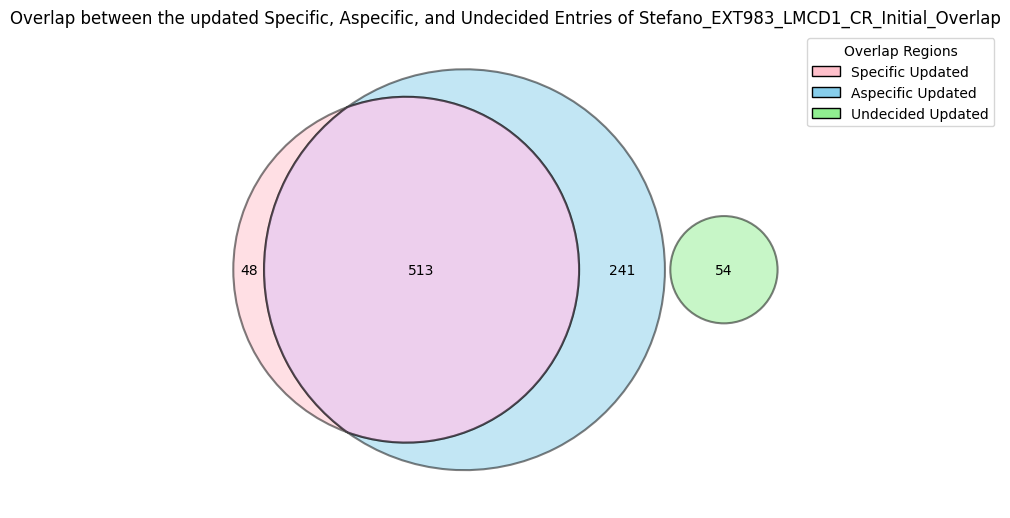

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/updated_venn_cutoffs\Stefano_EXT983_LMCD1_CR_Final_Overlap_updated_venn_cutoff.png


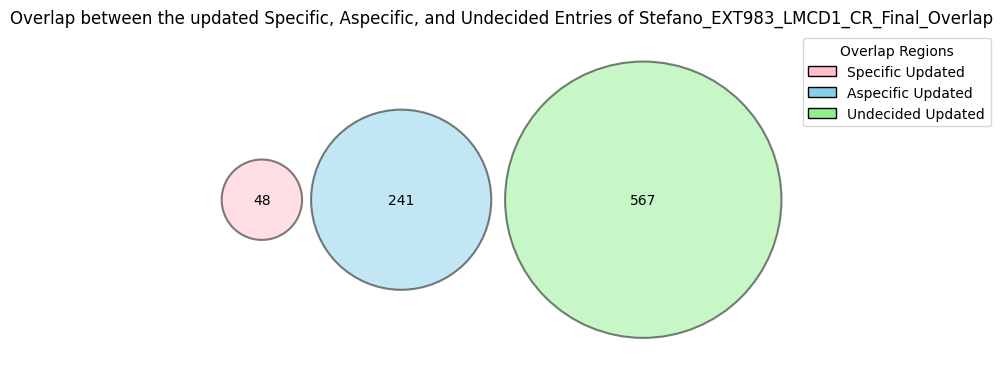

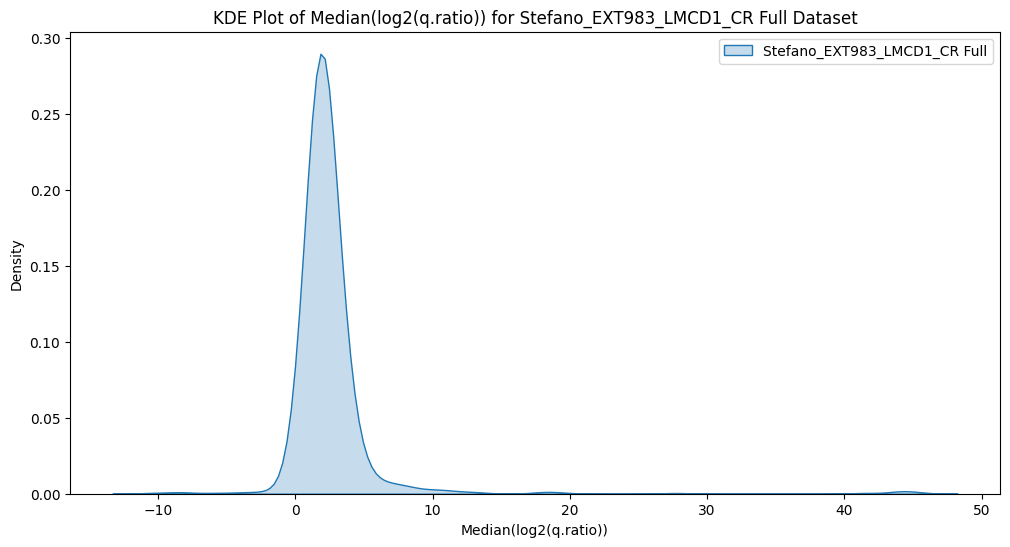

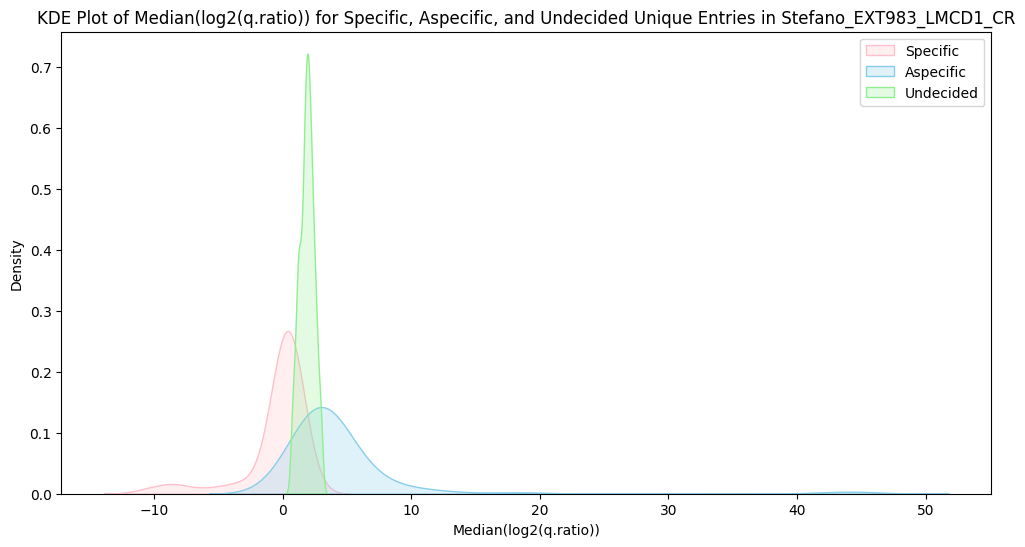

Total batches to process: 84
Processing batch 1 of 84: 10 IDs
Processing batch 2 of 84: 10 IDs
Processing batch 3 of 84: 10 IDs
Processing batch 4 of 84: 10 IDs
Processing batch 5 of 84: 10 IDs
Processing batch 6 of 84: 10 IDs
Processing batch 7 of 84: 10 IDs
Processing batch 8 of 84: 10 IDs
Processing batch 9 of 84: 10 IDs
Processing batch 10 of 84: 10 IDs
Processing batch 11 of 84: 10 IDs
Processing batch 12 of 84: 10 IDs
Processing batch 13 of 84: 10 IDs
Processing batch 14 of 84: 10 IDs
Processing batch 15 of 84: 10 IDs
Processing batch 16 of 84: 10 IDs
Processing batch 17 of 84: 10 IDs
Processing batch 18 of 84: 10 IDs
Processing batch 19 of 84: 10 IDs
Processing batch 20 of 84: 10 IDs
Processing batch 21 of 84: 10 IDs
Processing batch 22 of 84: 10 IDs
Processing batch 23 of 84: 10 IDs
Processing batch 24 of 84: 10 IDs
Processing batch 25 of 84: 10 IDs
Processing batch 26 of 84: 10 IDs
Processing batch 27 of 84: 10 IDs
Processing batch 28 of 84: 10 IDs
Processing batch 29 of 84: 1

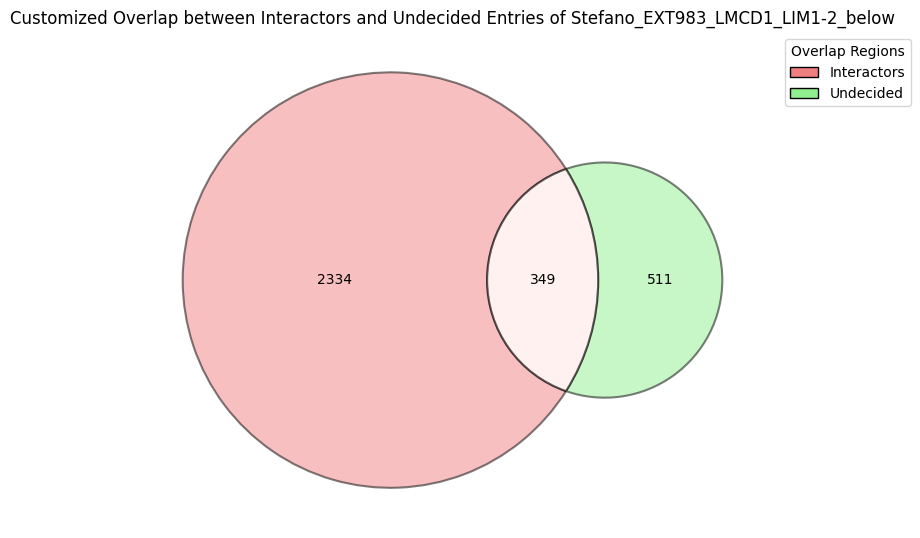

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/venn_interactors\Stefano_EXT983_LMCD1_LIM1-2_above_venn_interactors.png


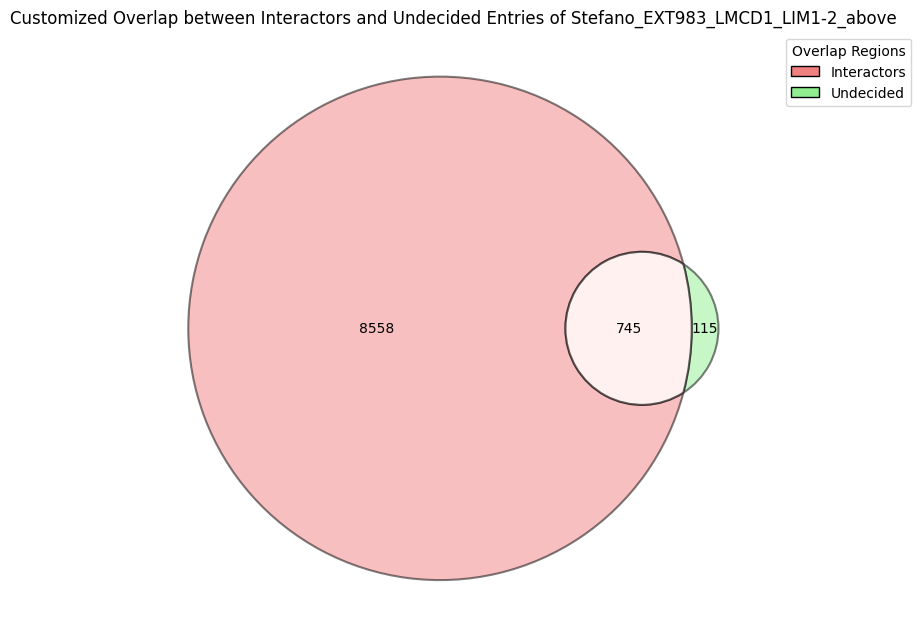

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/updated_venn_cutoffs\Stefano_EXT983_LMCD1_LIM1-2_Initial_Overlap_updated_venn_cutoff.png


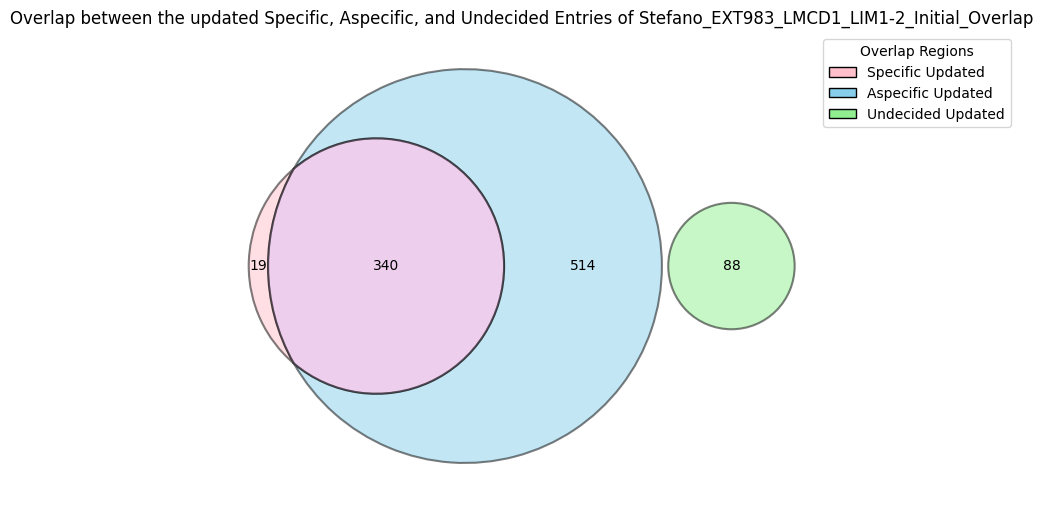

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/updated_venn_cutoffs\Stefano_EXT983_LMCD1_LIM1-2_Final_Overlap_updated_venn_cutoff.png


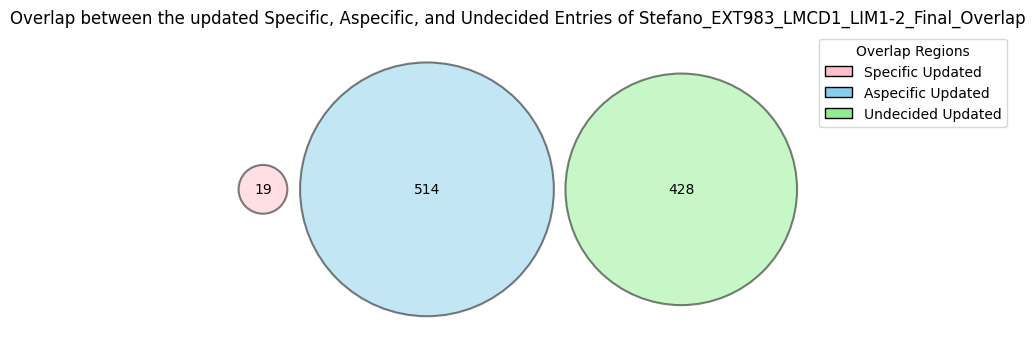

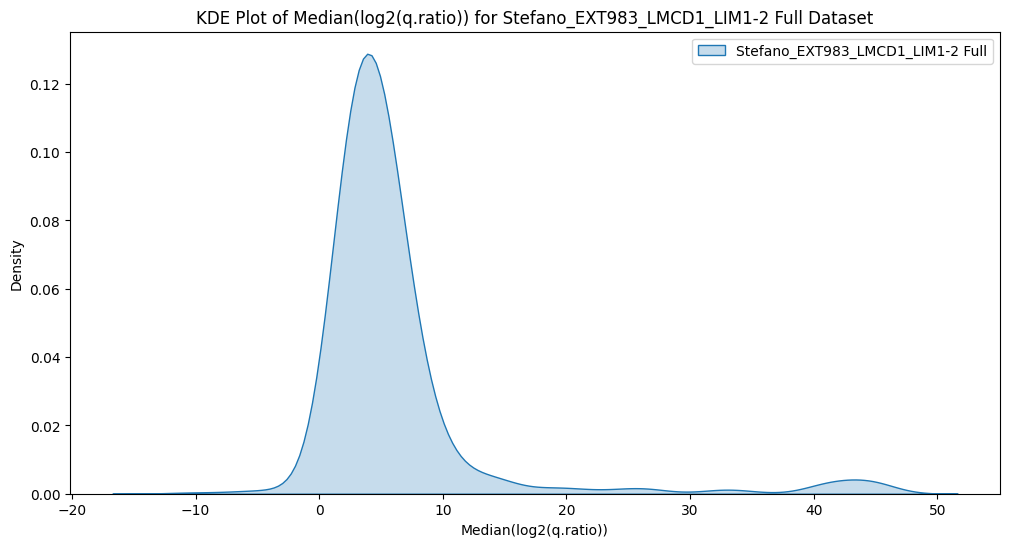

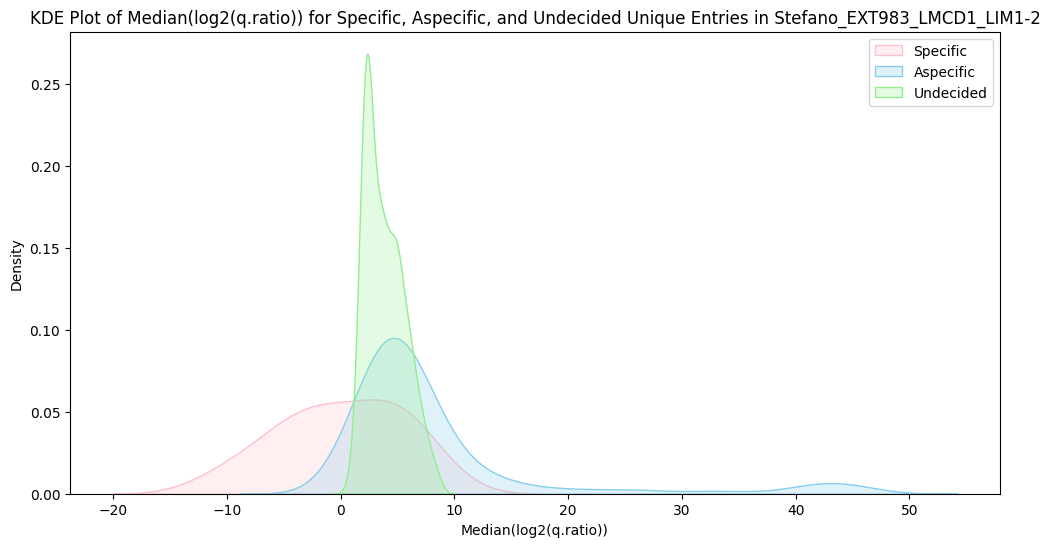

Total batches to process: 80
Processing batch 1 of 80: 10 IDs
Processing batch 2 of 80: 10 IDs
Processing batch 3 of 80: 10 IDs
Processing batch 4 of 80: 10 IDs
Processing batch 5 of 80: 10 IDs
Processing batch 6 of 80: 10 IDs
Processing batch 7 of 80: 10 IDs
Processing batch 8 of 80: 10 IDs
Processing batch 9 of 80: 10 IDs
Processing batch 10 of 80: 10 IDs
Processing batch 11 of 80: 10 IDs
Processing batch 12 of 80: 10 IDs
Processing batch 13 of 80: 10 IDs
Processing batch 14 of 80: 10 IDs
Processing batch 15 of 80: 10 IDs
Processing batch 16 of 80: 10 IDs
Processing batch 17 of 80: 10 IDs
Processing batch 18 of 80: 10 IDs
Processing batch 19 of 80: 10 IDs
Processing batch 20 of 80: 10 IDs
Processing batch 21 of 80: 10 IDs
Processing batch 22 of 80: 10 IDs
Processing batch 23 of 80: 10 IDs
Processing batch 24 of 80: 10 IDs
Processing batch 25 of 80: 10 IDs
Processing batch 26 of 80: 10 IDs
Processing batch 27 of 80: 10 IDs
Processing batch 28 of 80: 10 IDs
Processing batch 29 of 80: 1

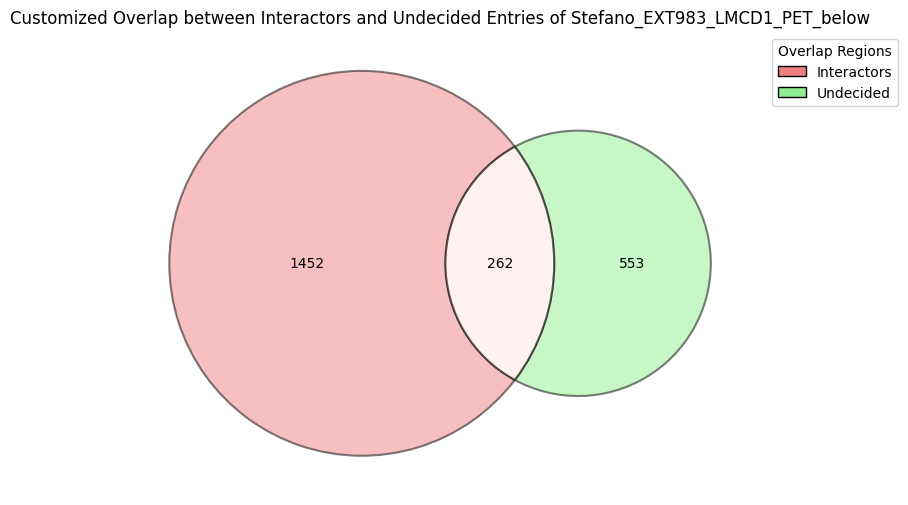

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/venn_interactors\Stefano_EXT983_LMCD1_PET_above_venn_interactors.png


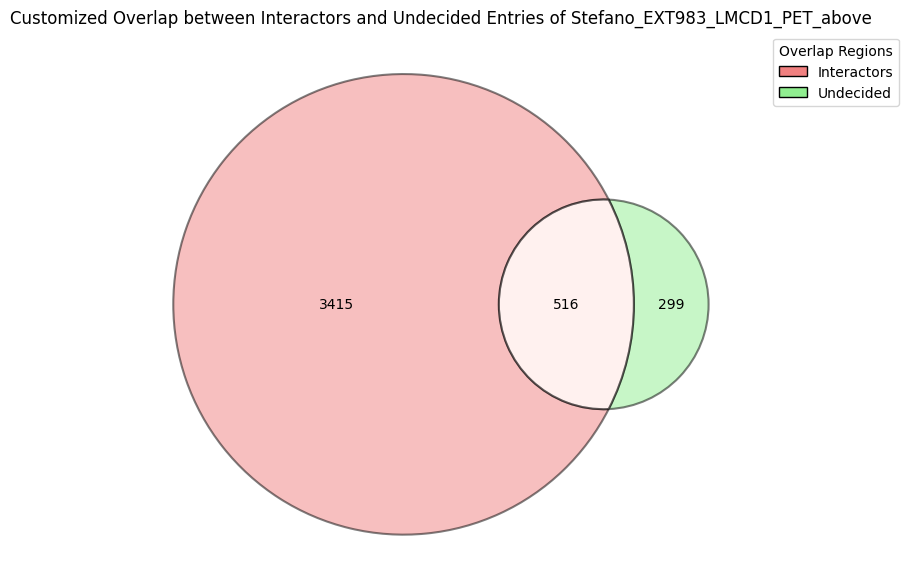

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/updated_venn_cutoffs\Stefano_EXT983_LMCD1_PET_Initial_Overlap_updated_venn_cutoff.png


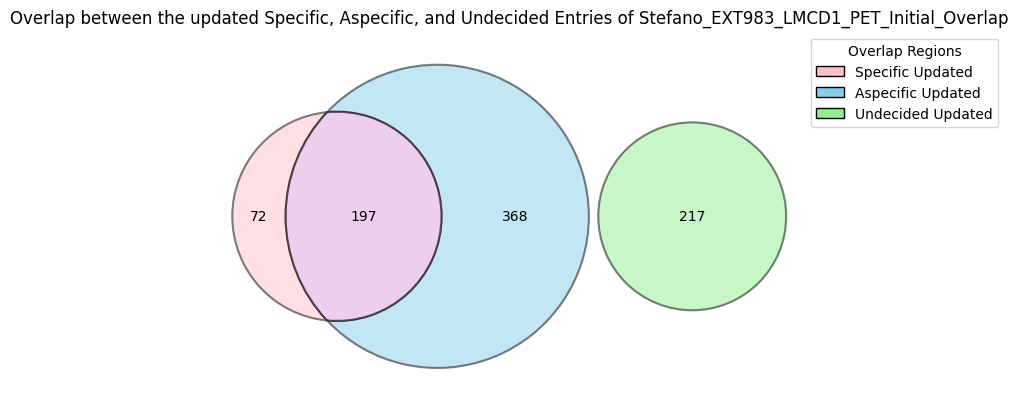

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/updated_venn_cutoffs\Stefano_EXT983_LMCD1_PET_Final_Overlap_updated_venn_cutoff.png


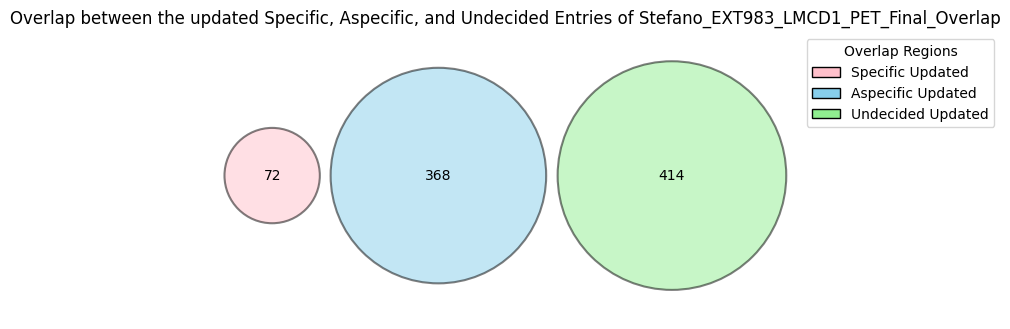

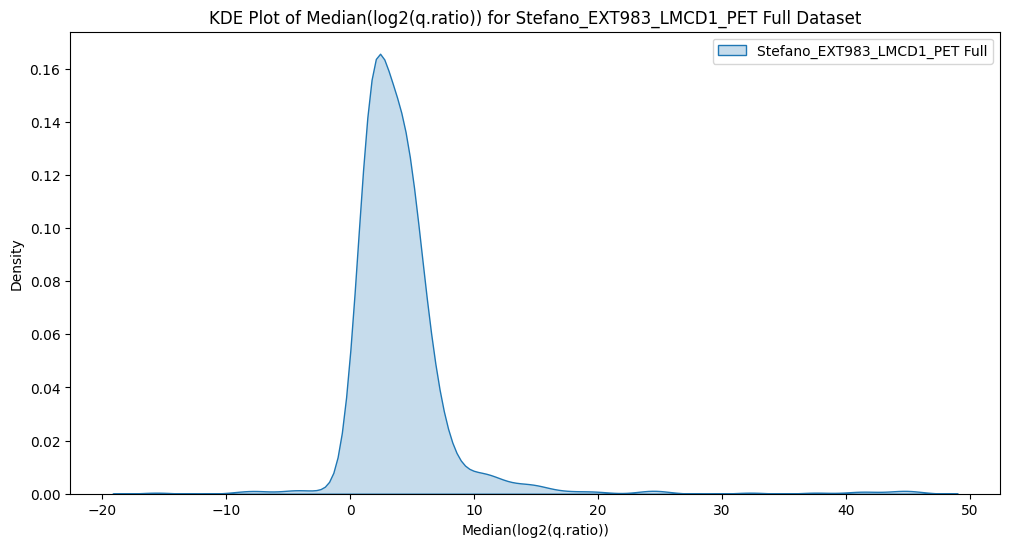

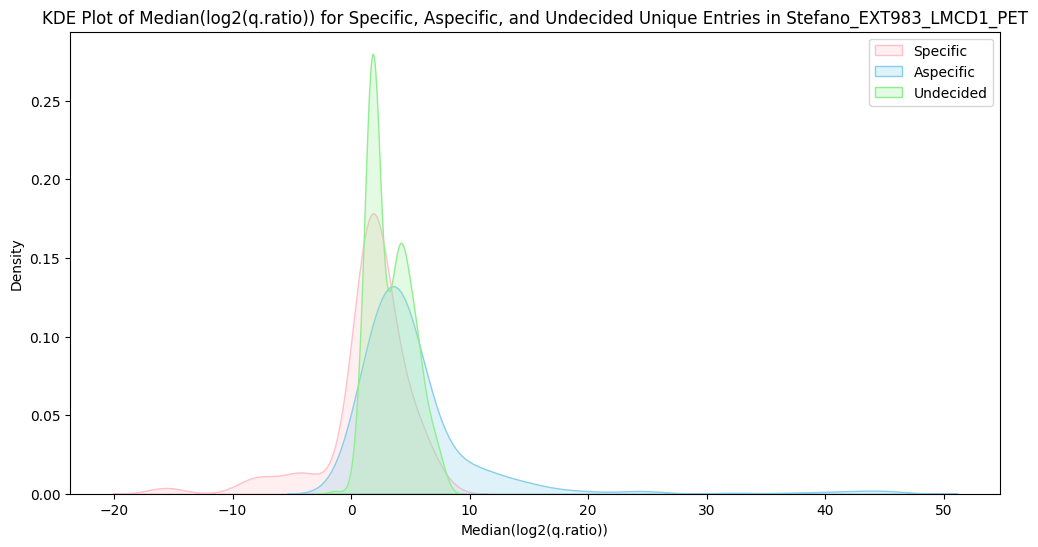

Total batches to process: 43
Processing batch 1 of 43: 10 IDs
Processing batch 2 of 43: 10 IDs
Processing batch 3 of 43: 10 IDs
Processing batch 4 of 43: 10 IDs
Processing batch 5 of 43: 10 IDs
Processing batch 6 of 43: 10 IDs
Processing batch 7 of 43: 10 IDs
Processing batch 8 of 43: 10 IDs
Processing batch 9 of 43: 10 IDs
Processing batch 10 of 43: 10 IDs
Processing batch 11 of 43: 10 IDs
Processing batch 12 of 43: 10 IDs
Processing batch 13 of 43: 10 IDs
Processing batch 14 of 43: 10 IDs
Processing batch 15 of 43: 10 IDs
Processing batch 16 of 43: 10 IDs
Processing batch 17 of 43: 10 IDs
Processing batch 18 of 43: 10 IDs
Processing batch 19 of 43: 10 IDs
Processing batch 20 of 43: 10 IDs
Processing batch 21 of 43: 10 IDs
Processing batch 22 of 43: 10 IDs
Processing batch 23 of 43: 10 IDs
Processing batch 24 of 43: 10 IDs
Processing batch 25 of 43: 10 IDs
Processing batch 26 of 43: 10 IDs
Processing batch 27 of 43: 10 IDs
Processing batch 28 of 43: 10 IDs
Processing batch 29 of 43: 1

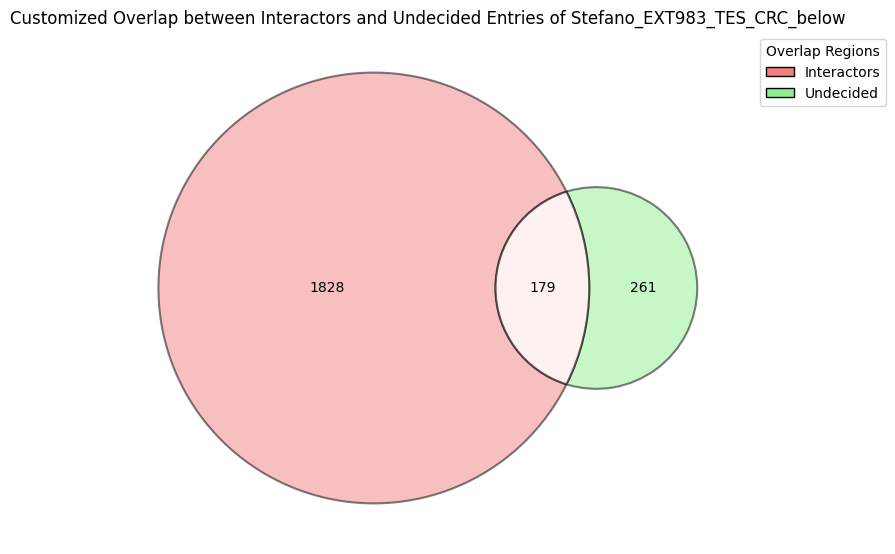

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/venn_interactors\Stefano_EXT983_TES_CRC_above_venn_interactors.png


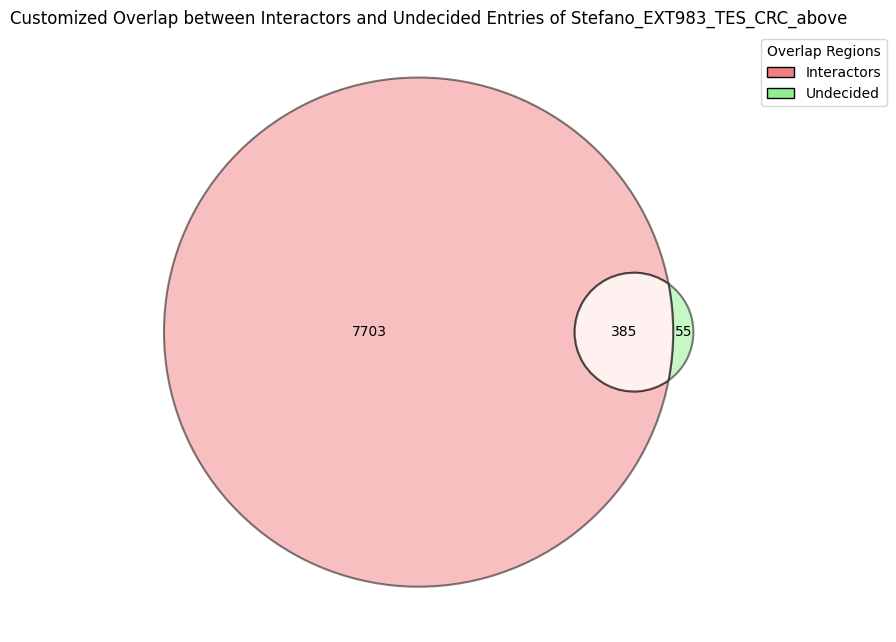

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/updated_venn_cutoffs\Stefano_EXT983_TES_CRC_Initial_Overlap_updated_venn_cutoff.png


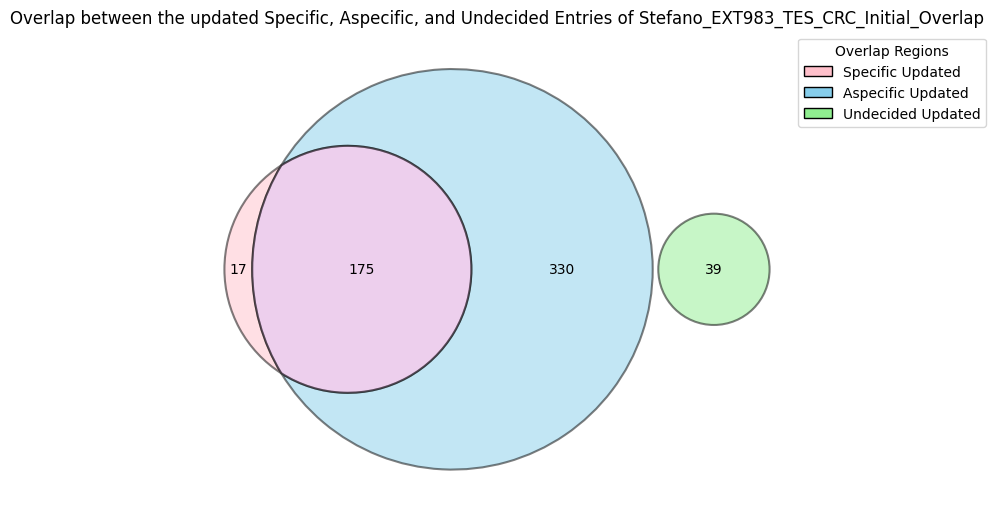

Venn diagram saved at G:/My Drive/Uni/Thesis/Data/datasets_cutoff/updated_venn_cutoffs\Stefano_EXT983_TES_CRC_Final_Overlap_updated_venn_cutoff.png


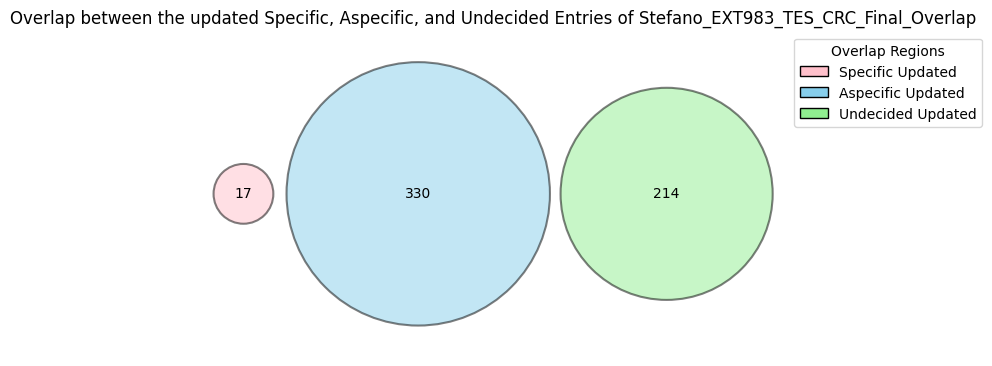

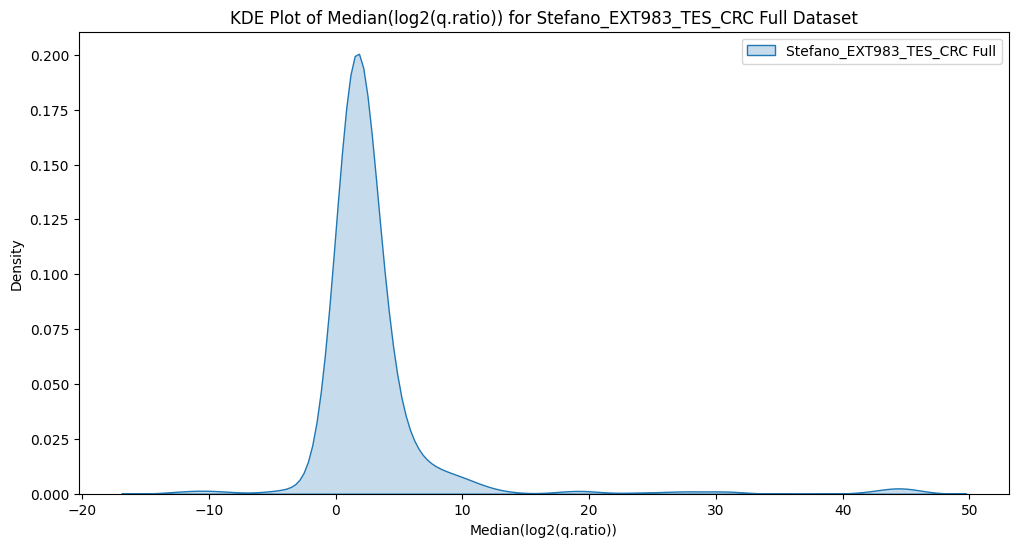

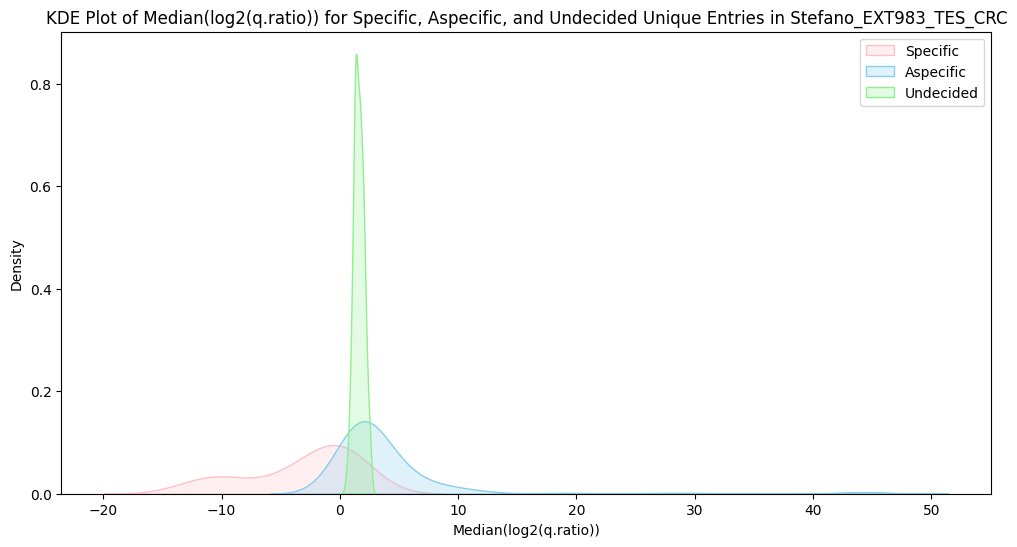

In [ ]:
# The 'process_results_dict' function continues the analysis as described in the disseration and in the own_method_explained notebook.
processed_dict = process_results_dict(cutoff_dict)

In [7]:
processed_dict.keys()

dict_keys(['Stefano_EXT983_LMCD1_FL', 'Stefano_EXT983_LMCD1_CR', 'Stefano_EXT983_LMCD1_LIM1-2', 'Stefano_EXT983_LMCD1_PET', 'Stefano_EXT983_TES_CRC'])

In [ ]:
# Save the final results to a separate Excel file for each dataset, with each subset in a separate sheet.
save_processed_results_to_excel_separate_files(processed_dict, "G:/My Drive/Uni/Thesis/Data/datasets_cutoff/final_results", "processed")